# Deep Learning model for Credit health check

## importing libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import RobustScaler, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, log_loss
from sklearn.utils.class_weight import compute_class_weight

In [ ]:
df=pd.read_csv('credit_score_cleaned_train.csv')

In [ ]:
df


,id,customer_id,month,name,age,ssn,occupation,annual_income,monthly_inhand_salary,credit_history_age,...,changed_credit_limit,num_credit_inquiries,credit_mix,outstanding_debt,credit_utilization_ratio,payment_of_min_amount,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.8434,89,...,11.27,4,Good,809.98,26.822620,No,80.415300,High_spent_Small_value_payments,312.49408,2
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.8434,93,...,11.27,4,Good,809.98,31.944960,No,118.280220,Low_spent_Large_value_payments,284.62915,2
2,0x1604,CUS_0xd40,March,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.8434,91,...,11.27,4,Good,809.98,28.609352,No,81.699524,Low_spent_Medium_value_payments,331.20987,2
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.8434,92,...,6.27,4,Good,809.98,31.377861,No,199.458070,Low_spent_Small_value_payments,223.45131,2
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.8434,93,...,11.27,4,Good,809.98,24.797346,No,41.420155,High_spent_Medium_value_payments,341.48923,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96691,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.4158,130,...,11.50,3,Good,502.38,34.663570,No,60.971333,High_spent_Large_value_payments,479.86624,0
96692,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.4158,131,...,11.50,3,Good,502.38,40.565630,No,54.185950,High_spent_Medium_value_payments,496.65160,0
96693,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.4158,132,...,11.50,3,Good,502.38,41.255524,No,24.028477,High_spent_Large_value_payments,516.80910,0
96694,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.4158,133,...,11.50,3,Good,502.38,33.638206,No,251.672580,Low_spent_Large_value_payments,319.16498,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96696 entries, 0 to 96695
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        96696 non-null  object 
 1   customer_id               96696 non-null  object 
 2   month                     96696 non-null  object 
 3   name                      96696 non-null  object 
 4   age                       96696 non-null  int64  
 5   ssn                       96696 non-null  object 
 6   occupation                96696 non-null  object 
 7   annual_income             96696 non-null  float64
 8   monthly_inhand_salary     96696 non-null  float64
 9   credit_history_age        96696 non-null  int64  
 10  total_emi_per_month       96696 non-null  float64
 11  num_bank_accounts         96696 non-null  int64  
 12  num_credit_card           96696 non-null  int64  
 13  interest_rate             96696 non-null  int64  
 14  num_of

In [ ]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Monthly_Inhand_Salary,84998.0,4194.170850,3183.686167,303.645417,1625.568229,3093.745000,5957.448333,15204.633333
Num_Bank_Accounts,100000.0,17.091280,117.404834,-1.000000,3.000000,6.000000,7.000000,1798.000000
Num_Credit_Card,100000.0,22.474430,129.057410,0.000000,4.000000,5.000000,7.000000,1499.000000
Interest_Rate,100000.0,72.466040,466.422621,1.000000,8.000000,13.000000,20.000000,5797.000000
Delay_from_due_date,100000.0,21.068780,14.860104,-5.000000,10.000000,18.000000,28.000000,67.000000
Num_Credit_Inquiries,98035.0,27.754251,193.177339,0.000000,3.000000,6.000000,9.000000,2597.000000
Credit_Utilization_Ratio,100000.0,32.285173,5.116875,20.000000,28.052567,32.305784,36.496663,50.000000
Total_EMI_per_month,100000.0,1403.118217,8306.041270,0.000000,30.306660,69.249473,161.224249,82331.000000


## Check the target distribution

In [ ]:
df["credit_score"].value_counts(normalize = True)

credit_score
1    0.532628
0    0.284241
2    0.183131
Name: proportion, dtype: float64

### Replacing '-' and spaces with underscores, converting other characters to lowercase

In [ ]:
unique_loan_types = ['Auto Loan', 'Credit-Builder Loan', 'Debt Consolidation Loan', 'Home Equity Loan', 'Mortgage Loan',
                     'No Loan', 'Not Specified', 'Payday Loan', 'Personal Loan', 'Student Loan']


for loan_type in unique_loan_types:

    cleaned_loan_type = loan_type.replace(' ', '_').replace('-', '_').lower()


    df[cleaned_loan_type] = df['type_of_loan'].apply(lambda x: x.count(loan_type))

### Removing unnecesarry columns

In [ ]:
df = df.drop([
    "id", "customer_id", "name", "ssn", "type_of_loan"], axis=1)

df.head()

,month,age,occupation,annual_income,monthly_inhand_salary,credit_history_age,total_emi_per_month,num_bank_accounts,num_credit_card,interest_rate,...,auto_loan,credit_builder_loan,debt_consolidation_loan,home_equity_loan,mortgage_loan,no_loan,not_specified,payday_loan,personal_loan,student_loan
0,January,23,Scientist,19114.12,1824.8434,89,49.574947,3,4,3,...,1,1,0,1,0,0,0,0,1,0
1,February,23,Scientist,19114.12,1824.8434,93,49.574947,3,4,3,...,1,1,0,1,0,0,0,0,1,0
2,March,23,Scientist,19114.12,1824.8434,91,49.574947,3,4,3,...,1,1,0,1,0,0,0,0,1,0
3,April,23,Scientist,19114.12,1824.8434,92,49.574947,3,4,3,...,1,1,0,1,0,0,0,0,1,0
4,May,23,Scientist,19114.12,1824.8434,93,49.574947,3,4,3,...,1,1,0,1,0,0,0,0,1,0


In [ ]:
payment_mapping = {
    'High_spent_Large_value_payments': 6,
    'High_spent_Medium_value_payments': 5,
    'High_spent_Small_value_payments': 4,
    'Low_spent_Large_value_payments': 3,
    'Low_spent_Medium_value_payments': 2,
    'Low_spent_Small_value_payments': 1
}


df['payment_behaviour'] = df['payment_behaviour'].map(payment_mapping)

df['payment_behaviour'] = pd.to_numeric(df['payment_behaviour'], downcast='integer')

## Convert the credit_mix column to numerical values

In [ ]:

df['credit_mix'] = df['credit_mix'].map({'Good': 2, 'Standard': 1, 'Bad': 0})

df['credit_mix'] = pd.to_numeric(df['credit_mix'], downcast='integer')

In [ ]:
df['payment_of_min_amount'] = df['payment_of_min_amount'].map({'Yes': 1, 'No': 0})

df['payment_of_min_amount'] = pd.to_numeric(df['payment_of_min_amount'], downcast='integer')
df = pd.get_dummies(df, columns=['occupation'])


month_map = {
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July': 7,
    'August': 8
}

#Mapping
df['month'] = df['month'].map(month_map)

df['month'] = pd.to_numeric(df['month'], downcast='integer')

In [ ]:
X = df.drop("credit_score", axis=1)
y = df.credit_score

## Train Test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05,
                                                    stratify=y, random_state=42)

In [ ]:
robust_columns = ['total_emi_per_month', 'amount_invested_monthly', 'monthly_balance', "annual_income", "monthly_inhand_salary"]


standard_columns = [col for col in X_train.columns if col not in robust_columns]


scaler = ColumnTransformer(
    transformers=[
        ('standard', StandardScaler(), standard_columns),
        ('robust', RobustScaler(), robust_columns)])

X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
pd.Series(y_train).value_counts()

1    48928
0    26111
2    16822
Name: count, dtype: int64

In [ ]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred_probabilities = model.predict(X_train)
    y_train_pred = y_train_pred_probabilities.argmax(axis=1)
    y_pred_probabilities = model.predict(X_test)
    y_pred = y_pred_probabilities.argmax(axis=1)

    print("Test Set:")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

    print("\nTrain Set:")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

## MODEL PYTORCH

In [ ]:
torch.manual_seed(42)


class_weights_array = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights = torch.tensor(class_weights_array, dtype=torch.float32)

# Device configuration
device = torch.device("mps" if torch.mps.is_available() else "cpu")
print(device)


mps


## Define the model architecture

In [ ]:

class ANNModel(nn.Module):
    def __init__(self, input_size, num_classes):
        super(ANNModel, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_size, 256),
            nn.ReLU(),
            nn.BatchNorm1d(256),
            nn.Dropout(0.35),

            nn.Linear(256, 512),
            nn.ReLU(),
            nn.BatchNorm1d(512),
            nn.Dropout(0.1),

            nn.Linear(512, 256),
            nn.ReLU(),
            nn.BatchNorm1d(256),
            nn.Dropout(0.1),

            nn.Linear(256, 256),
            nn.ReLU(),
            nn.BatchNorm1d(256),
            nn.Dropout(0.1),

            nn.Linear(256, num_classes),
            nn.Softmax(dim=1)
        )

    def forward(self, x):
        return self.network(x)


## defining hyper-params

In [ ]:
input_size = X_train.shape[1]
num_classes = 3
model = ANNModel(input_size, num_classes).to(device)


criterion = nn.CrossEntropyLoss(weight=class_weights.to(device))


optimizer = optim.Adam(model.parameters(), lr=0.001)


patience = 35
best_val_accuracy = 0
counter = 0

# Training loop
num_epochs = 100
batch_size = 1024
train_dataset = torch.utils.data.TensorDataset(torch.tensor(X_train_scaled, dtype=torch.float32),
                                                torch.tensor(y_train, dtype=torch.long))
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

val_dataset = torch.utils.data.TensorDataset(torch.tensor(X_test_scaled, dtype=torch.float32),
                                              torch.tensor(y_test, dtype=torch.long))
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=False)



## Running the epochs

we are using dropout and early stopping to overcome the overfitting.

In [ ]:

train_accuracies = []
train_losses = []
val_losses = []
val_accuracies = []

for epoch in range(num_epochs):
    # Training phase
    model.train()
    train_loss = 0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        _, predicted_train = torch.max(outputs, 1)
        total_train += labels.size(0)
        correct_train += (predicted_train == labels).sum().item()

    train_accuracy = correct_train / total_train
    train_accuracies.append(train_accuracy)

    # Validation phase
    model.eval()
    val_loss = 0
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_accuracy = correct / total
    train_losses.append(train_loss / len(train_loader))
    val_losses.append(val_loss / len(val_loader))
    val_accuracies.append(val_accuracy)

    print(f"Epoch {epoch + 1}/{num_epochs}, Train Loss: {train_losses[-1]:.4f}, "
          f"Val Loss: {val_losses[-1]:.4f}, Val Accuracy: {val_accuracies[-1]:.4f}")

    # Early stopping logic
    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy
        best_model_weights = model.state_dict()
        counter = 0
    else:
        counter += 1
        if counter >= patience:
            print("Early stopping triggered!")
            break

# Load the best model weights
model.load_state_dict(best_model_weights)

# Plot training vs validation loss


Epoch 1/100, Train Loss: 0.8572, Val Loss: 0.8282, Val Accuracy: 0.6701
Epoch 2/100, Train Loss: 0.8361, Val Loss: 0.8271, Val Accuracy: 0.6707
Epoch 3/100, Train Loss: 0.8317, Val Loss: 0.8279, Val Accuracy: 0.6697
Epoch 4/100, Train Loss: 0.8300, Val Loss: 0.8253, Val Accuracy: 0.6699
Epoch 5/100, Train Loss: 0.8291, Val Loss: 0.8253, Val Accuracy: 0.6734
Epoch 6/100, Train Loss: 0.8273, Val Loss: 0.8244, Val Accuracy: 0.6722
Epoch 7/100, Train Loss: 0.8268, Val Loss: 0.8244, Val Accuracy: 0.6705
Epoch 8/100, Train Loss: 0.8259, Val Loss: 0.8241, Val Accuracy: 0.6720
Epoch 9/100, Train Loss: 0.8247, Val Loss: 0.8218, Val Accuracy: 0.6751
Epoch 10/100, Train Loss: 0.8237, Val Loss: 0.8208, Val Accuracy: 0.6751
Epoch 11/100, Train Loss: 0.8237, Val Loss: 0.8218, Val Accuracy: 0.6751
Epoch 12/100, Train Loss: 0.8222, Val Loss: 0.8206, Val Accuracy: 0.6753
Epoch 13/100, Train Loss: 0.8208, Val Loss: 0.8159, Val Accuracy: 0.6800
Epoch 14/100, Train Loss: 0.8168, Val Loss: 0.8118, Val Accu

<All keys matched successfully>

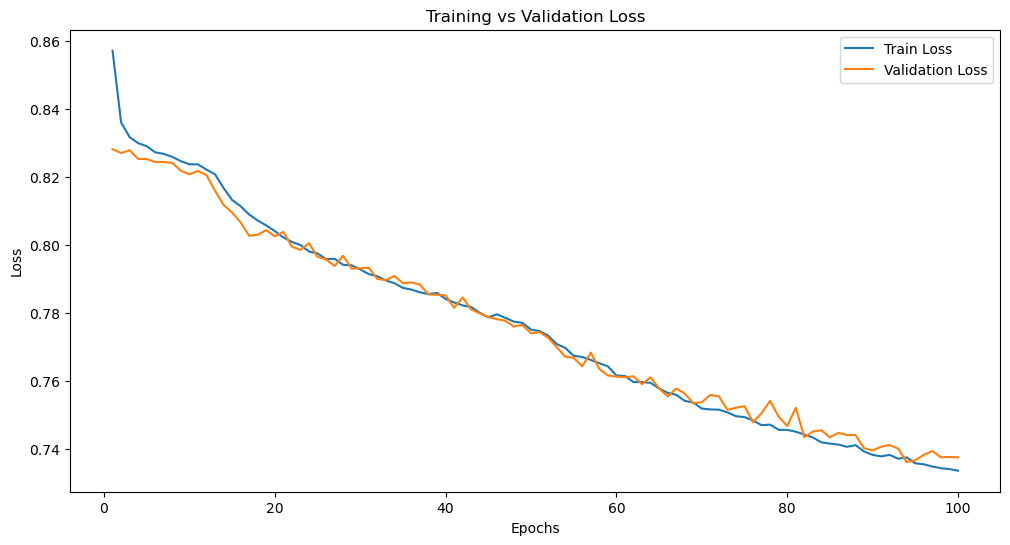

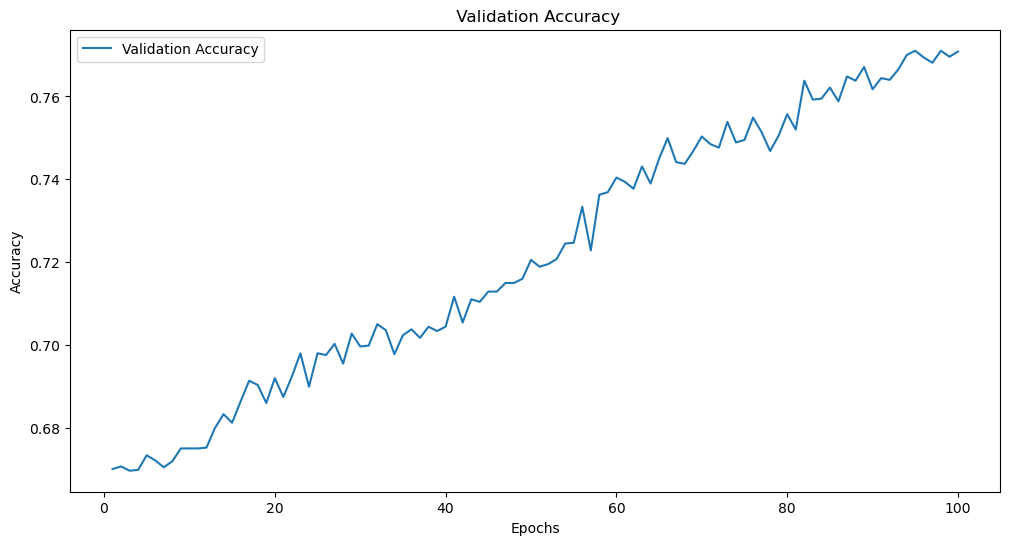

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Train Loss')
plt.plot(range(1, len(val_losses) + 1), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()

# Plot validation accuracy
plt.figure(figsize=(12, 6))

plt.plot(range(1, len(val_accuracies) + 1), val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title(' Validation Accuracy')
plt.legend()
plt.show()

## Confusion matrix and Classification report

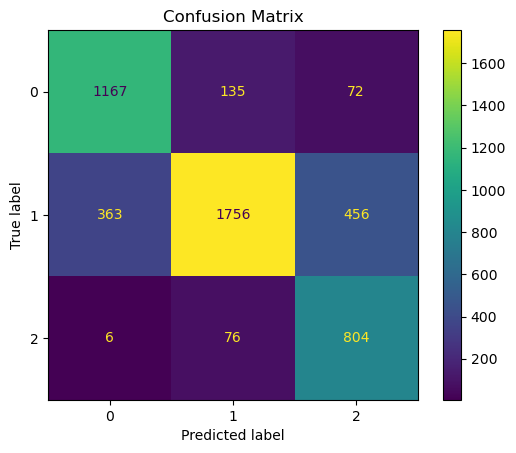

Classification Report on test:
              precision    recall  f1-score   support

     Class 0       0.76      0.85      0.80      1374
     Class 1       0.89      0.68      0.77      2575
     Class 2       0.60      0.91      0.72       886

    accuracy                           0.77      4835
   macro avg       0.75      0.81      0.77      4835
weighted avg       0.80      0.77      0.77      4835



In [ ]:
model.eval()
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, labels in val_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())


all_preds = np.array(all_preds)
all_labels = np.array(all_labels)


conf_matrix = confusion_matrix(all_labels, all_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.unique(all_labels))
disp.plot(cmap='viridis', values_format='d')
plt.title("Confusion Matrix")
plt.show()


class_report = classification_report(all_labels, all_preds, target_names=[f"Class {i}" for i in np.unique(all_labels)])
print("Classification Report on test:")
print(class_report)

# Comparison of Results

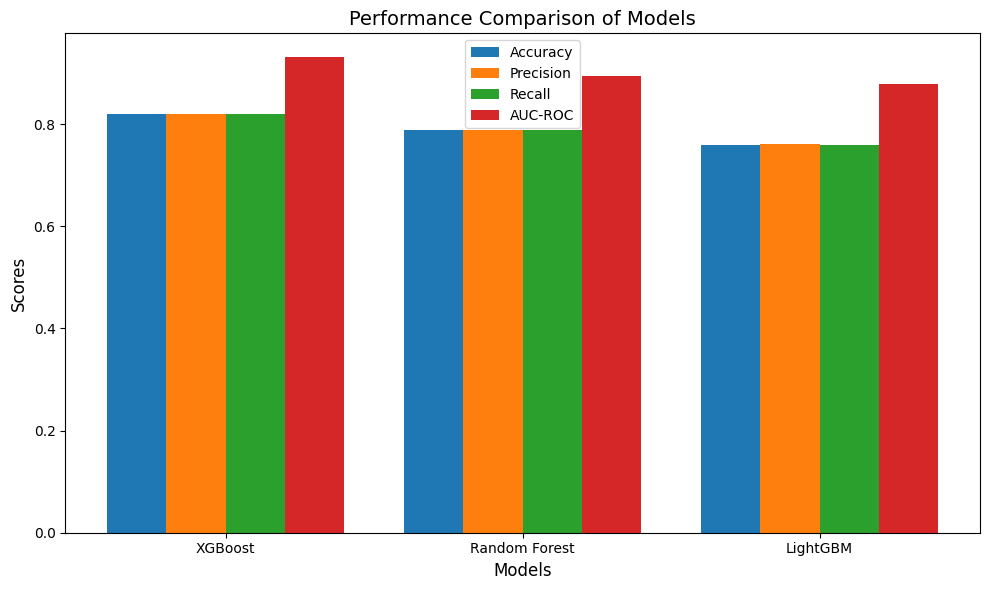

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Performance Metrics
models = ['XGBoost', 'Random Forest', 'LightGBM']
accuracy = [0.8201, 0.7882, 0.7588]
precision = [0.8193, 0.7883, 0.7603]
recall = [0.8201, 0.7882, 0.7588]
auc_roc = [0.9313, 0.8949, 0.8788]

# Bar Width and Positions
bar_width = 0.2
index = np.arange(len(models))

# Plot the bar graph
fig, ax = plt.subplots(figsize=(10, 6))

plt.bar(index, accuracy, bar_width, label='Accuracy')
plt.bar(index + bar_width, precision, bar_width, label='Precision')
plt.bar(index + 2 * bar_width, recall, bar_width, label='Recall')
plt.bar(index + 3 * bar_width, auc_roc, bar_width, label='AUC-ROC')

# Add Labels and Title
plt.xlabel('Models', fontsize=12)
plt.ylabel('Scores', fontsize=12)
plt.title('Performance Comparison of Models', fontsize=14)
plt.xticks(index + 1.5 * bar_width, models)
plt.legend()

# Final Layout Adjustments
plt.tight_layout()
plt.show()


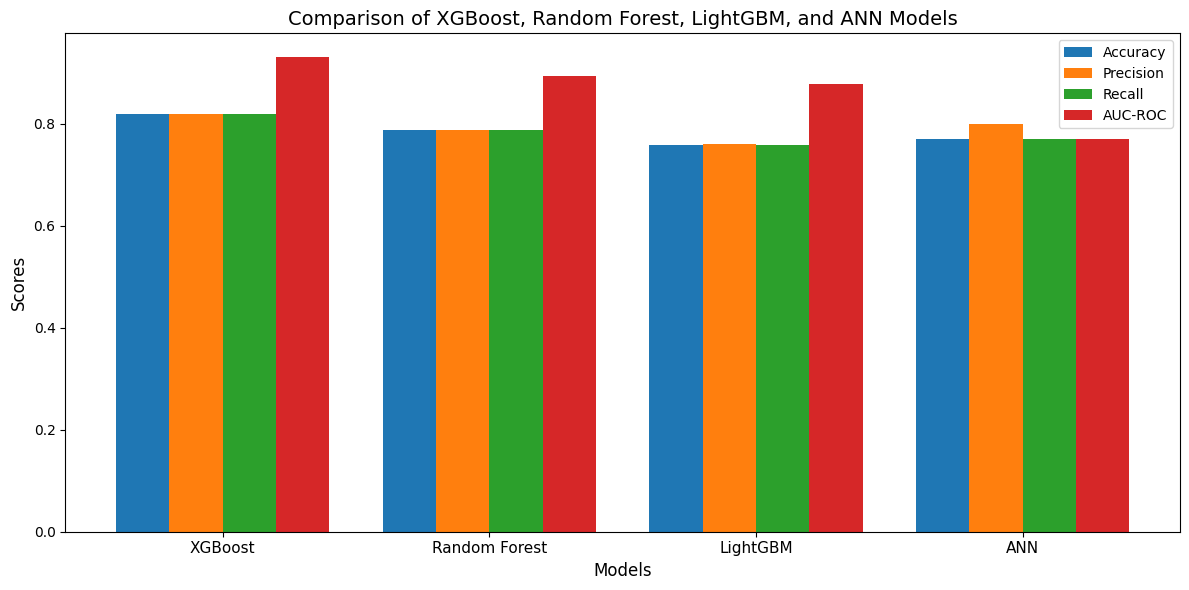

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Model performance metrics
models = ['XGBoost', 'Random Forest', 'LightGBM', 'ANN']
accuracy = [0.8201, 0.7882, 0.7588, 0.77]     # Updated Accuracy for XGBoost
precision = [0.8193, 0.7883, 0.7603, 0.80]   # Updated Precision for XGBoost
recall = [0.8201, 0.7882, 0.7588, 0.77]      # Updated Recall for XGBoost
auc_roc = [0.9313, 0.8949, 0.8788, 0.77]     # Updated AUC-ROC for XGBoost

# Bar position and width
x = np.arange(len(models))  # Positions for each model
width = 0.2  # Width of each bar

# Plot the comparison bar graph
fig, ax = plt.subplots(figsize=(12, 6))

# Plot each metric as grouped bars
ax.bar(x - 1.5*width, accuracy, width, label='Accuracy')
ax.bar(x - 0.5*width, precision, width, label='Precision')
ax.bar(x + 0.5*width, recall, width, label='Recall')
ax.bar(x + 1.5*width, auc_roc, width, label='AUC-ROC')

# Add labels and titles
ax.set_xlabel('Models', fontsize=12)
ax.set_ylabel('Scores', fontsize=12)
ax.set_title('Comparison of XGBoost, Random Forest, LightGBM, and ANN Models', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(models, fontsize=11)
ax.legend()

# Optimize layout for readability
plt.tight_layout()

# Display the plot
plt.show()


# Conclusion

The updated graph compares XGBoost, Random Forest, LightGBM, and ANN based on Accuracy, Precision, Recall, and AUC-ROC. Key insights include:

XGBoost:

Shows significant improvement, achieving the highest AUC-ROC (93.1%) and strong performance in Accuracy (82%), Precision (81.9%), and Recall (82%).
Now surpasses Random Forest and LightGBM in all metrics.
Random Forest:

Previously the top performer, it still maintains competitive performance but slightly trails XGBoost in all metrics.
LightGBM:

Continues to deliver balanced results but is now clearly outperformed by XGBoost and Random Forest.
ANN:

Maintains solid performance with Precision (80%) and Accuracy (77%), outperforming LightGBM in precision but lagging behind XGBoost and Random Forest.
Summary:
XGBoost emerges as the best-performing model with superior results across all metrics.
Random Forest remains a strong alternative, while ANN and LightGBM show competitive but slightly lower performance.

-------------------------------------------------------------------------------------------------
Thank you.

Group 3

In [ ]:
!jupyter nbconvert --to html "/content/drive/MyDrive/DEEP LEARNING SHREE/Deep learning Project/DL_Credit_MM.ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/DEEP LEARNING SHREE/Deep learning Project/DL_Credit_MM.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 5 image(s).
[NbConvertApp] Writing 615605 bytes to /content/drive/MyDrive/DEEP LEARNING SHREE/Deep learning Project/DL_Credit_MM.html


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
